In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from scipy.signal import find_peaks
from calibrator import Calibrator

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
spectrum = np.median(fits.open('v_a_20190516_55_1_0_1.fits')[0].data[110:120], axis=0)

peaks, _ = find_peaks(spectrum, distance=10., threshold=10.)

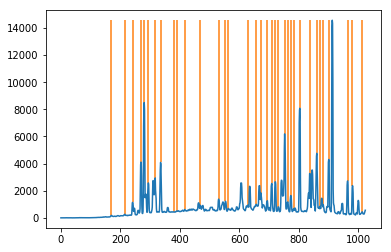

In [3]:
plt.plot(spectrum)
plt.vlines(peaks,
              spectrum[peaks.astype('int')],
              spectrum.max(),
              colors='C1')


In [20]:
c = Calibrator(peaks, elements=["Xe"], min_wavelength=3000., max_wavelength=8100.)
c.set_fit_constraints(
    min_intercept=2000.,
    max_intercept=5000.,
    fit_tolerance=9.2,
    thresh=5.,
    polydeg=4,
    fittype='poly')

[3950.92 3967.25 4078.82 4116.12 4193.5  4385.77 4500.98 4524.68 4582.75
 4603.03 4624.28 4671.23 4697.02 4734.15 4807.02 4818.   4829.71 4844.33
 4862.54 4921.48 4972.71 5023.88 5028.28 5044.92 5162.71 5191.37 5261.95
 5292.22 5339.38 5392.8  5419.15 5488.56 5496.07 5531.07 5566.62 5581.88
 5618.88 5695.75 5716.2  5740.17 5823.89 5856.51 5875.02 5893.29 5931.24
 5934.17 5974.15 5976.46 5998.12 6036.2  6043.38 6051.15 6101.43 6114.86
 6130.56 6178.3  6179.67 6182.42 6318.06 6595.56 6668.92 6681.04 6728.01
 6771.57 6818.38 6827.32 6848.82 6866.83 6872.11 6882.16 6925.53 6935.62
 6976.18 6990.88 7047.4  7119.6  7136.6  7164.8  7257.9  7284.3  7339.3
 7386.   7393.8  7424.1  7474.   7492.23 7584.68 7642.02 7664.56 7740.31
 7802.65 7887.4  7967.34]


Peak at: 4269.626411010957 A
Peak at: 4415.035196928876 A
Peak at: 4500.7908059199935 A
- matched to 4500.98 A
Peak at: 4594.323378442937 A
Peak at: 4631.360470844485 A
Peak at: 4678.709979674679 A
Peak at: 4756.956204934513 A
Peak at: 4818.5361708792325 A
- matched to 4818.0 A
Peak at: 4970.055200829583 A
- matched to 4972.71 A
Peak at: 5008.10540542386 A
Peak at: 5098.234336694833 A
Peak at: 5278.984859371296 A
Peak at: 5494.635016836781 A
- matched to 5496.07 A
Peak at: 5574.522566410625 A
Peak at: 5609.224478844132 A
Peak at: 5834.196937246592 A
Peak at: 5934.204447200924 A
- matched to 5934.17 A
Peak at: 5985.843929639888 A
Peak at: 6061.47958802955 A
Peak at: 6112.98573458665 A
- matched to 6114.86 A
Peak at: 6154.157890333659 A
Peak at: 6188.4485050647545 A
Peak at: 6260.412078894798 A
Peak at: 6298.088655551564 A
Peak at: 6332.33339478455 A
Peak at: 6366.575191110665 A
Peak at: 6435.064478206312 A
Peak at: 6548.163203910698 A
Peak at: 6630.569080147986 A
Peak at: 6668.403691029

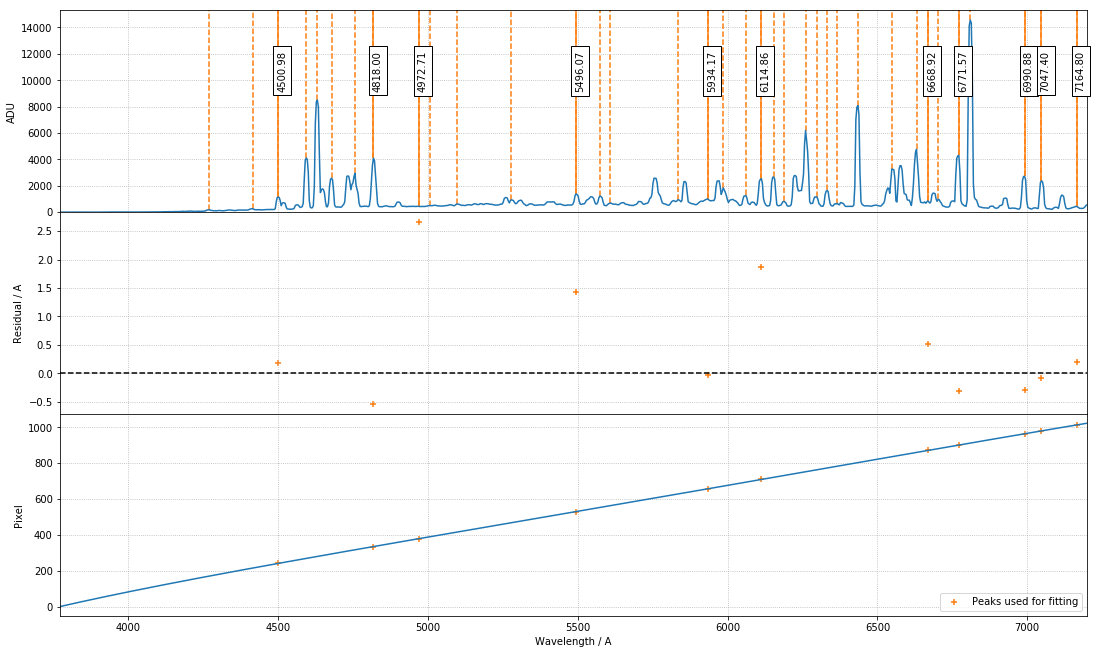

In [22]:
best_p = c.fit(mode='fast', progress=False)
c.plot_fit(spectrum, best_p, tolerance=4.6)

Peak at: 4763.15434910782 A
Peak at: 4938.023976455968 A
Peak at: 5039.520285499025 A
- matched to 5044.92 A
Peak at: 5149.142231859874 A
Peak at: 5192.287939045638 A
- matched to 5191.37 A
Peak at: 5247.259298645353 A
Peak at: 5337.69812744599 A
- matched to 5339.38 A
Peak at: 5408.574784487074 A
Peak at: 5582.122086195718 A
- matched to 5581.88 A
Peak at: 5625.56137304992 A
- matched to 5618.88 A
Peak at: 5728.298886455936 A
Peak at: 5933.953461720757 A
- matched to 5934.17 A
Peak at: 6179.26687276084 A
- matched to 6179.67 A
Peak at: 6270.254748457579 A
Peak at: 6309.807667468611 A
- matched to 6318.06 A
Peak at: 6566.746463031939 A
Peak at: 6681.270917073066 A
- matched to 6681.04 A
Peak at: 6740.477065521603 A
Peak at: 6827.273393178426 A
- matched to 6827.32 A
Peak at: 6886.425515685127 A
- matched to 6882.16 A
Peak at: 6933.731353853196 A
- matched to 6935.62 A
Peak at: 6973.142223722445 A
- matched to 6976.18 A
Peak at: 7055.874206319583 A
- matched to 7047.4 A
Peak at: 7099.19

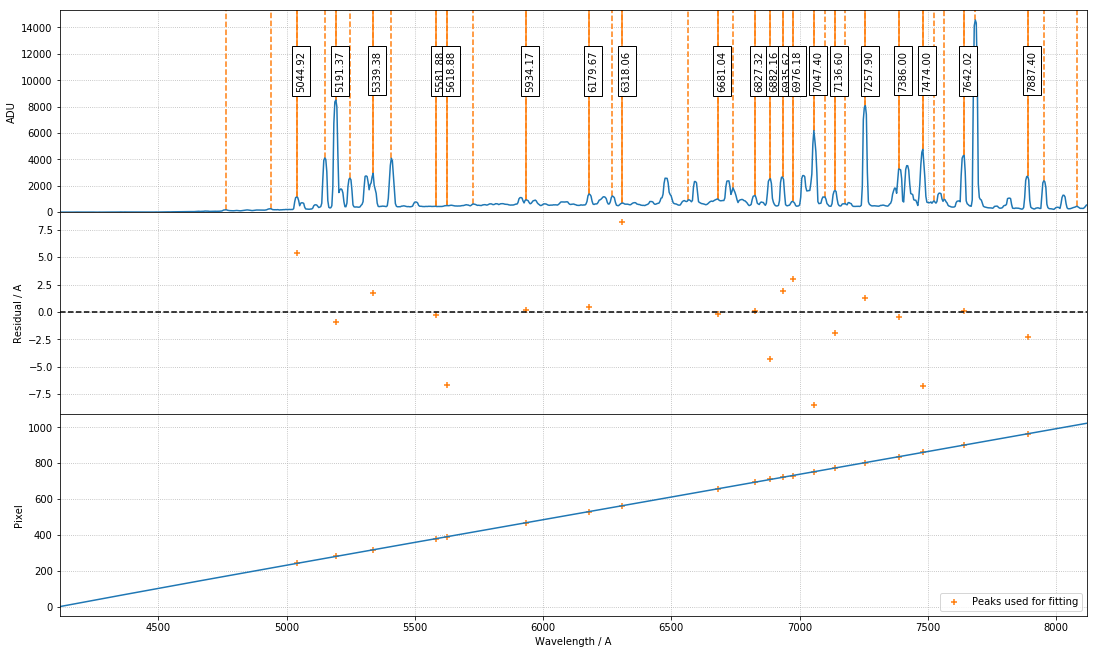

In [18]:
best_p = c.fit(mode='normal', progress=False)
c.plot_fit(spectrum, best_p, tolerance=9.2)

In [ ]:
best_p = c.fit(mode='slow', progress=False)
c.plot_fit(spectrum, best_p)